# 1. Load libraries

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import numba as nb
import pandas as pd
import scipy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mpmath as mp

# 2. Load saved data

In [43]:
saved_data = np.load('BestiaConcatenateLeftRightMost.npz')

In [77]:
saved_data = np.load('ImprovedSims/ConcatenateImproved.npz')
#ImprovedSims/ConcatenateImproved.npz

In [78]:
dataFloquetReal = saved_data['dataFloquetReal']
dataFloquetReal.shape

(314, 661, 90)

In [79]:
dataFloquetImag = saved_data['dataFloquetImaginary']
dataFloquetImag.shape

(314, 661, 90)

In [80]:
dataStatus = saved_data['dataStatus']
dataStatus.shape

(314, 661)

In [81]:
dataVector_Iext_e[0]

np.float64(1.0)

In [82]:
dataVector_Iext_e = saved_data['vector_Iext_e']
dataVector_Iext_e.shape

(314,)

In [83]:
dataVector_eps = saved_data['vector_eps']
dataVector_eps.shape

(661,)

### Compute max Floquet exponents

In [194]:
indices = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
maxFloquet = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
imagFloquet = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
Floquet_1 = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
Floquet_2 = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
Floquet_3 = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
Floquet_4 = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
Floquet_5 = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
Floquet_6 = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
Floquet_7 = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
Floquet_8 = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
Floquet_9 = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
Floquet_10 = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
Floquet_20 = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
Floquet_30 = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
Floquet_40 = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))

for i in range(len(dataVector_eps)):
    for j in range(len(dataVector_Iext_e)):
        Floquet = dataFloquetReal[j,i,:]
        #print(Floquet[0])
        maxFloquet[i,j] = np.amax(Floquet[1:len(Floquet)])

        if not np.isnan(maxFloquet[i,j]):
            indices[i,j] =  np.argmax(Floquet[1:len(Floquet)])
            imagFloquet[i,j] = dataFloquetImag[j,i,int(indices[i,j])]
        else:
            indices[i,j] = np.nan
            imagFloquet[i,j] = np.nan
        
        #print(indices[i,j])
        Floquet_1[i,j] = Floquet[0]
        Floquet_2[i,j] = Floquet[1]
        Floquet_3[i,j] = Floquet[2]
        Floquet_4[i,j] = Floquet[3]
        Floquet_5[i,j] = Floquet[4]
        Floquet_6[i,j] = Floquet[5]
        Floquet_7[i,j] = Floquet[6]
        Floquet_8[i,j] = Floquet[7]
        Floquet_9[i,j] = Floquet[8]
        Floquet_10[i,j] = Floquet[9]
        Floquet_20[i,j] = Floquet[19]
        Floquet_30[i,j] = Floquet[29]
        Floquet_40[i,j] = Floquet[39]
indices = indices+1

In [18]:
Floquet_1

array([[            nan,             nan,             nan, ...,
         2.21194183e-08, -7.55059707e-08,  3.38850719e-09],
       [            nan,             nan,             nan, ...,
        -4.25826257e-08, -7.73183775e-08, -2.91812013e-08],
       [            nan,             nan,             nan, ...,
        -1.02435177e-07, -4.01202293e-08, -5.14407355e-08],
       ...,
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])

In [19]:
np.nanmax(Floquet_1)

np.float64(0.003458734351289985)

In [109]:
dataHopf = np.load('ExportHopf.npz')
lc1_2d = dataHopf["lc1_2d"]
sd_lc_bif = dataHopf["sd_lc_bif"]

In [122]:
lc1_2d[0,:,4]

array([254.08931458, 254.06844902, 253.96851476, ...,  56.69653719,
        56.7383598 ,  56.75733853])

### 2D diagram

Text(0.5, 1.0, 'Real part')

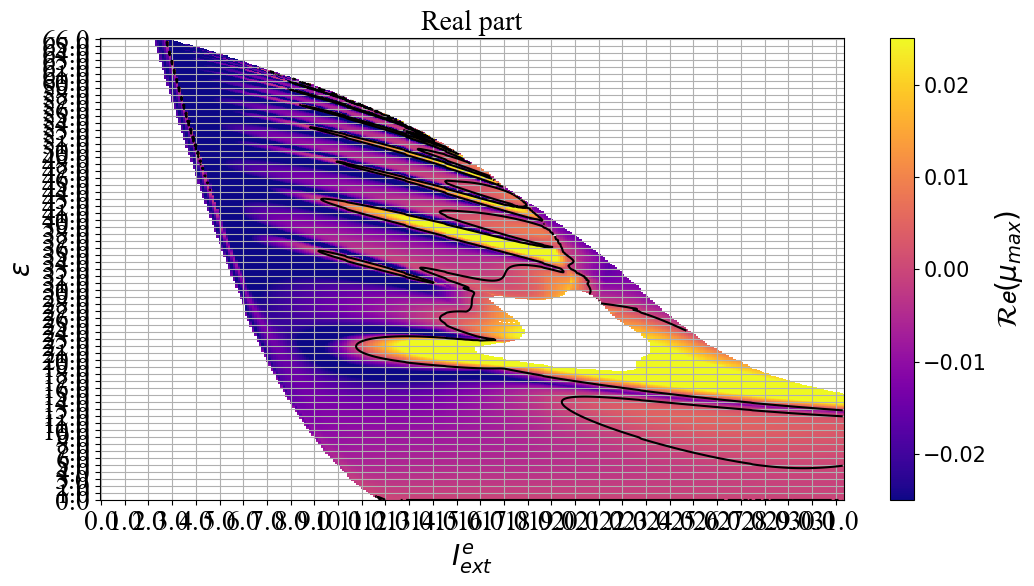

In [99]:
%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(maxFloquet,cmap='plasma', interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.grid(True) 
cbar = plt.colorbar()
plt.contour(maxFloquet,levels=[0],colors='black')
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=10)
edges_yticks = np.arange(len(dataVector_eps),step=10)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/10,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/10,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\mathcal{Re}(\mu_{max})$', fontsize=20,fontname='Times New Roman')
plt.title('Real part',fontsize=20,fontname='Times New Roman')

Text(0.5, 1.0, 'Real part')

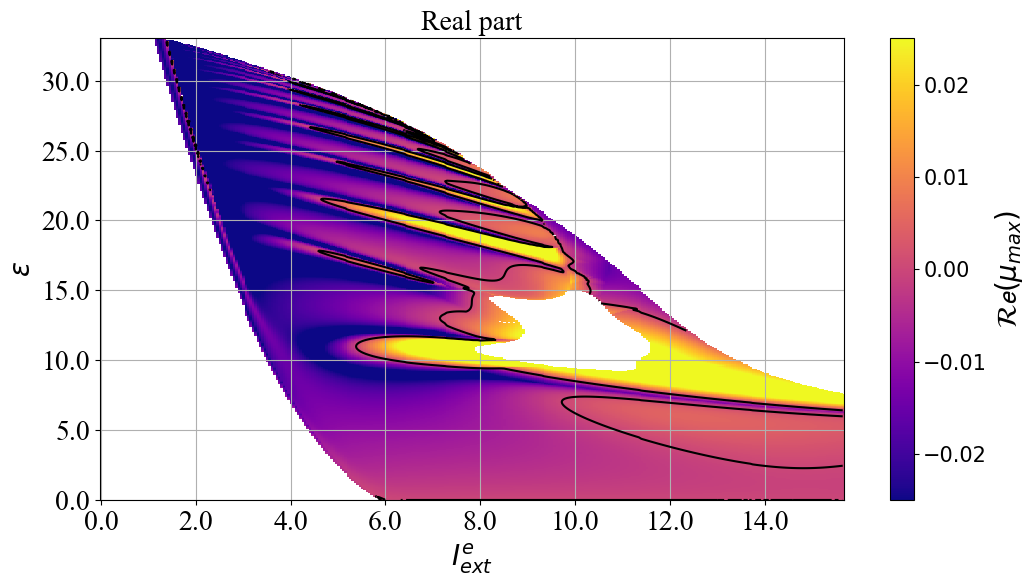

In [236]:
%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(maxFloquet,cmap='plasma', interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.grid(True) 
cbar = plt.colorbar()
plt.contour(maxFloquet,levels=[0],colors='black')
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=40)
edges_yticks = np.arange(len(dataVector_eps),step=100)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/20,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/20,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\mathcal{Re}(\mu_{max})$', fontsize=20,fontname='Times New Roman')
plt.title('Real part',fontsize=20,fontname='Times New Roman')

In [101]:
len(dataVector_Iext_e)

314

In [102]:
edges_xticks = np.arange(len(dataVector_Iext_e)+1,step=42)
edges_xticks

array([  0,  42,  84, 126, 168, 210, 252, 294])

In [103]:
labels_xticks = np.arange(2,18,step=2)
labels_xticks

array([ 2,  4,  6,  8, 10, 12, 14, 16])

In [104]:
dataVector_Iext_e[len(dataVector_Iext_e)-1]
dataVector_Iext_e[0]

np.float64(0.0)

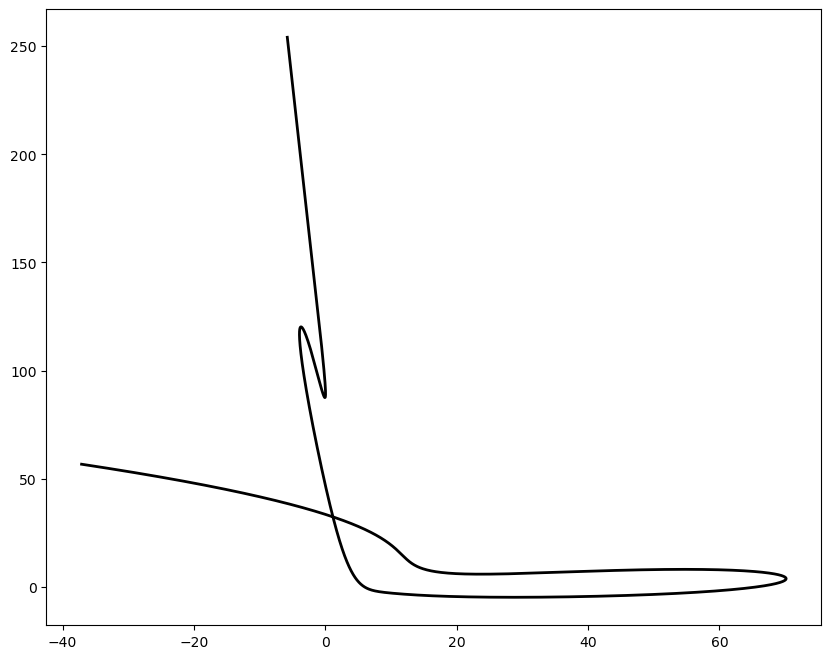

In [149]:
fig2=plt.figure(figsize=(10,8))
#Customize axis
ax=plt.axes()
plt.plot(lc1_2d[0,:,0],lc1_2d[0,:,4], linewidth=2, color="black")
#plt.xlim([0,16])
#plt.xlim([0,len(lc1_2d)])
#Bistability region --> Green
#plt.plot(sd_lc_bif[0,:,0],sd_lc_bif[0,:,4], linewidth=2, color="black")

In [141]:
from matplotlib.transforms import Bbox

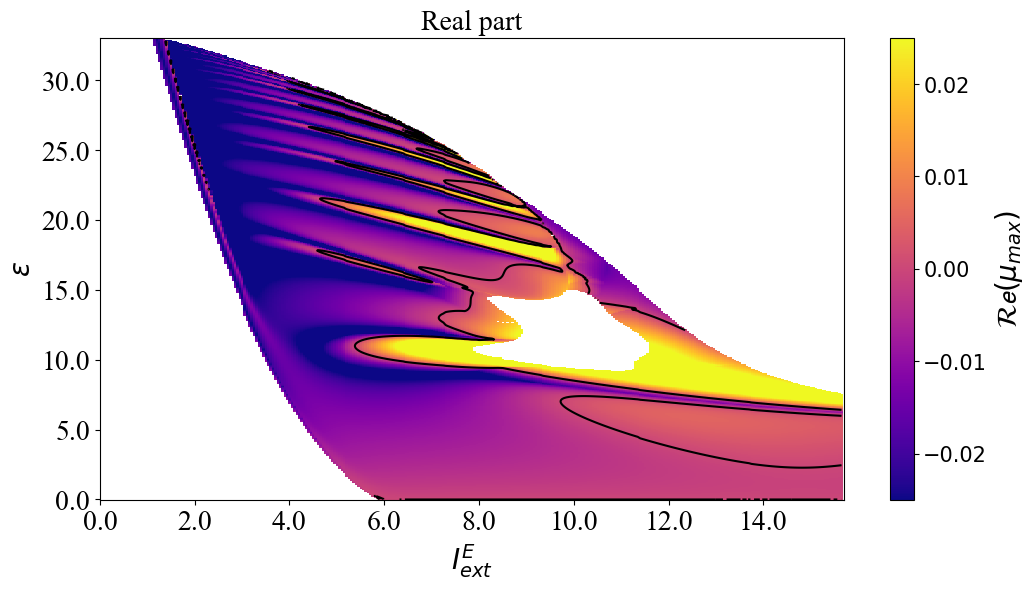

In [177]:
%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(maxFloquet,cmap='plasma', interpolation='nearest',vmin=-0.025,vmax=0.025)
#Hopf --> Purple
#plt.plot(lc1_2d['Iext_e'],lc1_2d['eps'], linewidth=2, color=dict_color["indigo"])

#Bistability region --> Green
#plt.plot(sd_lc_bif['Iext_e'],sd_lc_bif['eps'], linewidth=2, color=dict_color["seagreen"])
cbar = plt.colorbar()
plt.contour(maxFloquet,levels=[0],colors='black')
plt.xlabel(r'$I_{ext}^E$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=40)
edges_yticks = np.arange(len(dataVector_eps),step=100)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/20,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/20,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\mathcal{Re}(\mu_{max})$', fontsize=20,fontname='Times New Roman')
plt.xlim([0,len(dataVector_Iext_e)])
plt.title('Real part',fontsize=20,fontname='Times New Roman')
plt.savefig('Definitive/RealFloquet.png',dpi=500,bbox_inches=Bbox([[0,-1],fig1.get_size_inches()]))

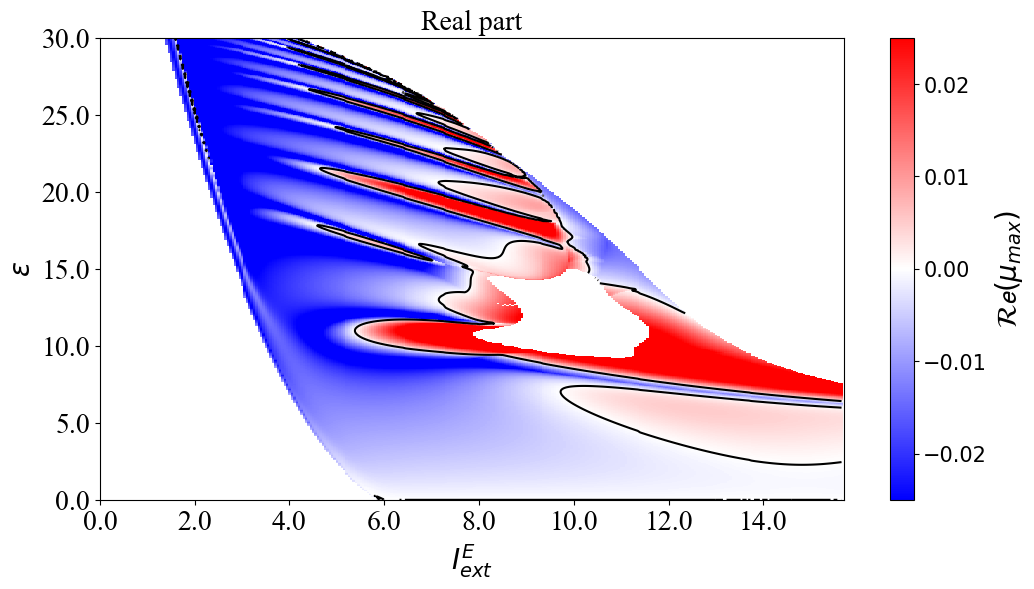

In [240]:
%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(maxFloquet,cmap='bwr', interpolation='nearest',vmin=-0.025,vmax=0.025)
#Hopf --> Purple
#plt.plot(lc1_2d['Iext_e'],lc1_2d['eps'], linewidth=2, color=dict_color["indigo"])

#Bistability region --> Green
#plt.plot(sd_lc_bif['Iext_e'],sd_lc_bif['eps'], linewidth=2, color=dict_color["seagreen"])
cbar = plt.colorbar()
plt.contour(maxFloquet,levels=[0],colors='black')
plt.xlabel(r'$I_{ext}^E$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=40)
edges_yticks = np.arange(len(dataVector_eps),step=100)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/20,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/20,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\mathcal{Re}(\mu_{max})$', fontsize=20,fontname='Times New Roman')
plt.xlim([0,len(dataVector_Iext_e)])
plt.title('Real part',fontsize=20,fontname='Times New Roman')
plt.ylim([0,600])
plt.savefig('Definitive/RealFloquet.png',dpi=500,bbox_inches=Bbox([[0,-1],fig1.get_size_inches()]))

Text(0.5, 1.0, 'Real part')

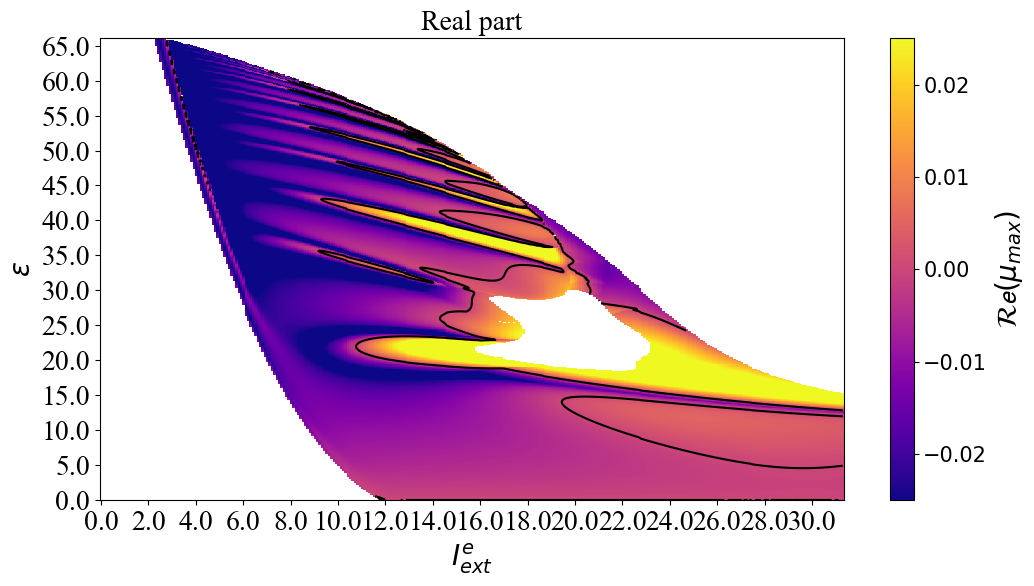

In [107]:
%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(maxFloquet,cmap='plasma', interpolation='nearest',vmin=-0.025,vmax=0.025)
cbar = plt.colorbar()
plt.contour(maxFloquet,levels=[0],colors='black')
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=20)
edges_yticks = np.arange(len(dataVector_eps),step=50)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/10,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/10,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\mathcal{Re}(\mu_{max})$', fontsize=20,fontname='Times New Roman')
plt.title('Real part',fontsize=20,fontname='Times New Roman')

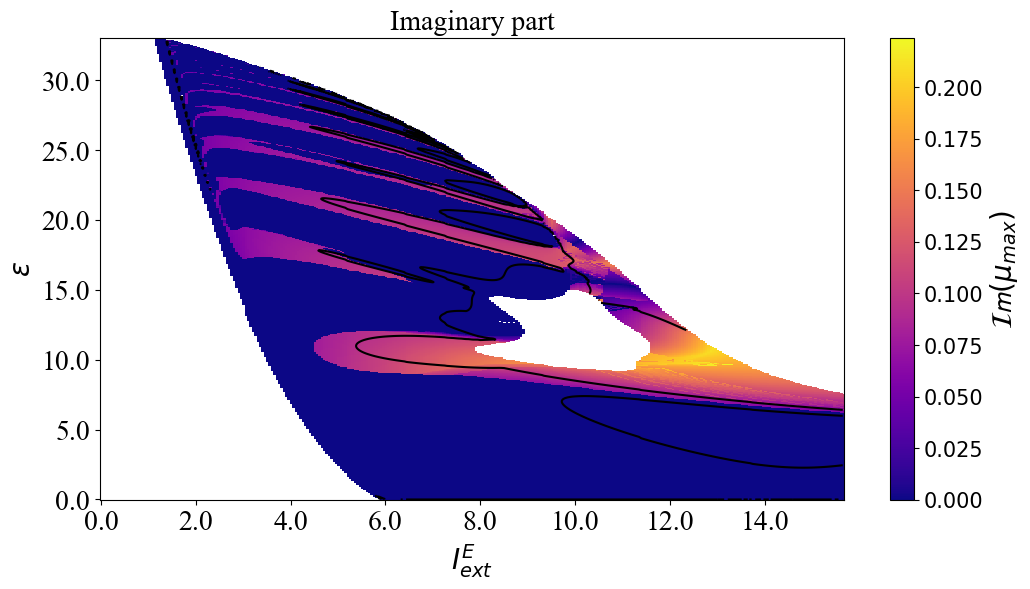

In [178]:
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(imagFloquet,cmap='plasma', interpolation='nearest')
cbar = plt.colorbar()
plt.contour(maxFloquet,levels=[0],colors='black')
plt.xlabel(r'$I_{ext}^E$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=40)
edges_yticks = np.arange(len(dataVector_eps),step=100)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/20,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/20,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\mathcal{Im}(\mu_{max})$',fontsize=20,fontname='Times New Roman')
plt.title('Imaginary part',fontsize=20,fontname='Times New Roman')
plt.savefig('Definitive/ImagFloquet.png',dpi=500,bbox_inches=Bbox([[0,-1],fig1.get_size_inches()]))

Text(0.5, 1.0, 'Imaginary part')

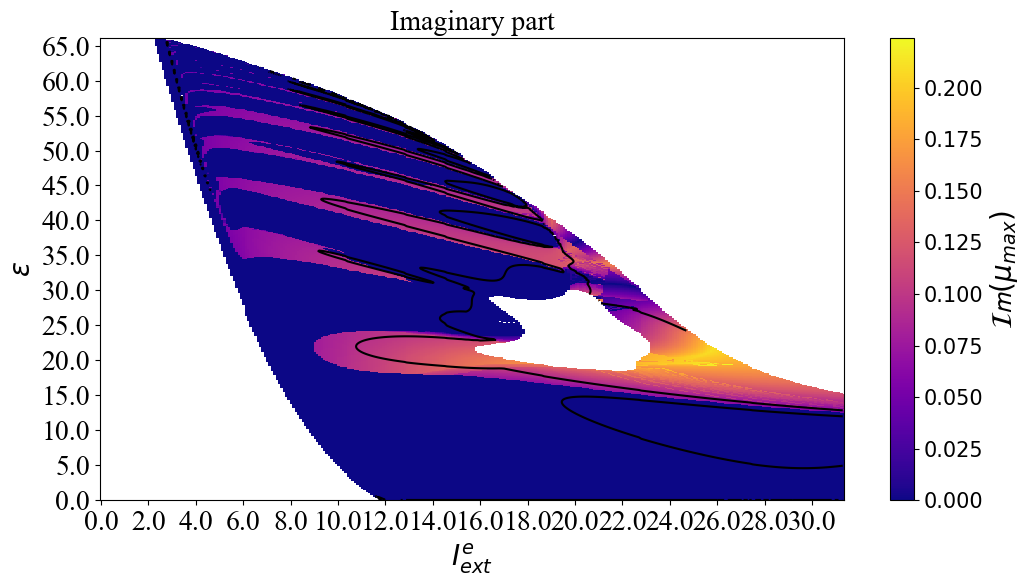

In [108]:
%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(imagFloquet,cmap='plasma', interpolation='nearest')
cbar = plt.colorbar()
plt.contour(maxFloquet,levels=[0],colors='black')
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=20)
edges_yticks = np.arange(len(dataVector_eps),step=50)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/10,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/10,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\mathcal{Im}(\mu_{max})$',fontsize=20,fontname='Times New Roman')
plt.title('Imaginary part',fontsize=20,fontname='Times New Roman')

### 3D diagram

In [13]:
%matplotlib qt
X, Y = np.meshgrid(dataVector_Iext_e,dataVector_eps)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X,Y,maxFloquet, cmap='inferno',vmin=-0.025,vmax=0.025)
Z_plane = np.zeros_like(maxFloquet)  # Create a Z array of zeros with the same shape as the matrix
ax.plot_surface(X, Y, Z_plane, color='black', alpha=0.5)  # Red color and transparent
#ax.gca().invert_yaxis()
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=15)

### Separate Floquet exponents

In [162]:
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
dic_color = mcolors.CSS4_COLORS

In [195]:
Floquet_2_pos = np.where(Floquet_2 >= 0, Floquet_2, np.nan)
Floquet_3_pos = np.where(Floquet_3 >= 0, Floquet_3, np.nan)
Floquet_4_pos = np.where(Floquet_4 >= 0, Floquet_4, np.nan)
Floquet_5_pos = np.where(Floquet_5 >= 0, Floquet_5, np.nan)
Floquet_6_pos = np.where(Floquet_6 >= 0, Floquet_6, np.nan)
Floquet_7_pos = np.where(Floquet_7 >= 0, Floquet_7, np.nan)
Floquet_8_pos = np.where(Floquet_8 >= 0, Floquet_8, np.nan)
Floquet_9_pos = np.where(Floquet_9 >= 0, Floquet_9, np.nan)
Floquet_10_pos = np.where(Floquet_10 >= 0, Floquet_10, np.nan)
Floquet_20_pos = np.where(Floquet_20 >= 0, Floquet_20,np.nan)
Floquet_30_pos = np.where(Floquet_30 >= 0, Floquet_30,np.nan)
Floquet_40_pos = np.where(Floquet_40 >= 0, Floquet_40,np.nan)

Text(0.5, 1.0, '$\\alpha$')

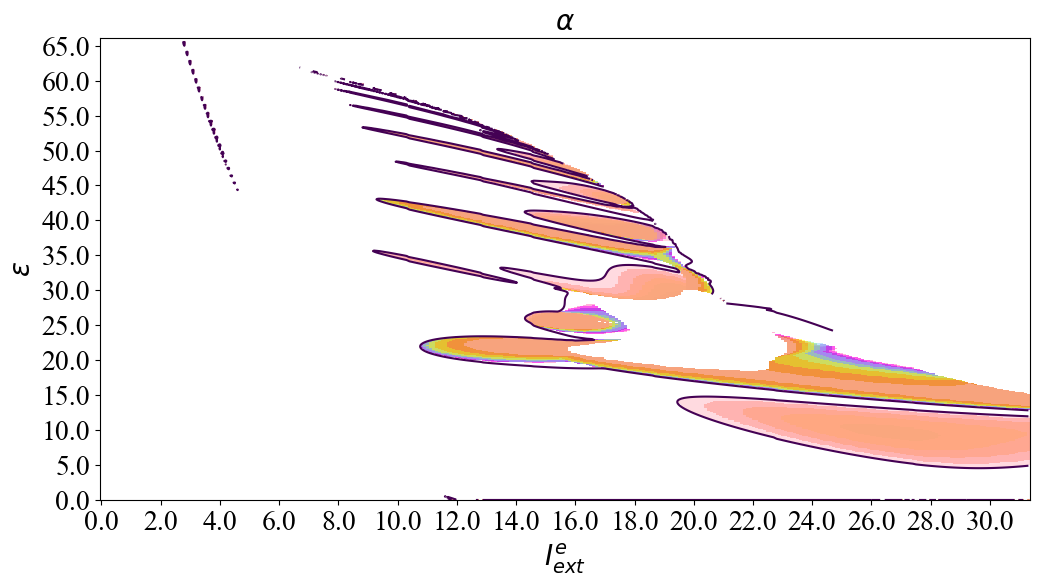

In [164]:
cmap_white = ListedColormap([dic_color['white']])
cmap_2 = ListedColormap([dic_color['lightpink']])
cmap_3 = ListedColormap([dic_color['tomato']])
cmap_4 = ListedColormap([dic_color['orange']])
cmap_5 = ListedColormap([dic_color['yellow']])
cmap_6 = ListedColormap([dic_color['lightgreen']])
cmap_7 = ListedColormap([dic_color['lightskyblue']])
cmap_8 = ListedColormap([dic_color['blueviolet']])
cmap_9 = ListedColormap([dic_color['magenta']])
cmap_10 = ListedColormap([dic_color['hotpink']])

%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(Floquet_10_pos,cmap=cmap_10, interpolation='nearest',vmin=-0.025,vmax=0.025,alpha=0.5)
plt.imshow(Floquet_9_pos,cmap=cmap_9, interpolation='nearest',vmin=-0.025,vmax=0.025,alpha=0.5)
plt.imshow(Floquet_8_pos,cmap=cmap_8, interpolation='nearest',vmin=-0.025,vmax=0.025,alpha=0.5)
plt.imshow(Floquet_7_pos,cmap=cmap_7, interpolation='nearest',vmin=-0.025,vmax=0.025,alpha=0.5)
plt.imshow(Floquet_6_pos,cmap=cmap_6, interpolation='nearest',vmin=-0.025,vmax=0.025,alpha=0.5)
plt.imshow(Floquet_5_pos,cmap=cmap_5, interpolation='nearest',vmin=-0.025,vmax=0.025,alpha=0.5)
plt.imshow(Floquet_4_pos,cmap=cmap_4, interpolation='nearest',vmin=-0.025,vmax=0.025,alpha=0.5)
plt.imshow(Floquet_3_pos,cmap=cmap_3, interpolation='nearest',vmin=-0.025,vmax=0.025,alpha=0.5)
plt.imshow(Floquet_2_pos,cmap=cmap_2, interpolation='nearest',vmin=-0.025,vmax=0.025,alpha=0.5)
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=20)
edges_yticks = np.arange(len(dataVector_eps),step=50)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/10,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/10,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
plt.title(r'$\alpha$',fontsize=20,fontname='Times New Roman')
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=15)
#cbar.set_label(r'$\mu_{max}$', fontsize=20,fontname='Times New Roman')

(0.0, 600.0)

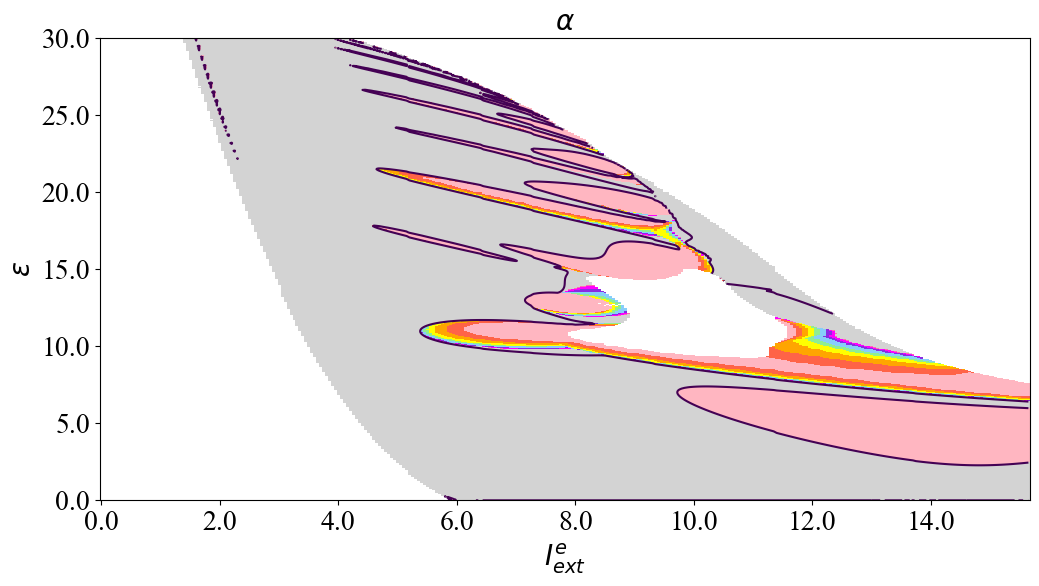

In [235]:
cmap_white = ListedColormap([dic_color['white']])
cmap_2 = ListedColormap([dic_color['lightpink']])
cmap_3 = ListedColormap([dic_color['tomato']])
cmap_4 = ListedColormap([dic_color['orange']])
cmap_5 = ListedColormap([dic_color['yellow']])
cmap_6 = ListedColormap([dic_color['lightgreen']])
cmap_7 = ListedColormap([dic_color['lightskyblue']])
cmap_8 = ListedColormap([dic_color['blueviolet']])
cmap_9 = ListedColormap([dic_color['magenta']])
cmap_10 = ListedColormap([dic_color['hotpink']])


cmap_status2 = ListedColormap([dic_color['lightgray']])
status2 = np.transpose(np.where(dataStatus == 2,dataStatus,np.nan))

%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(status2,cmap=cmap_status2, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_10_pos,cmap=cmap_10, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_9_pos,cmap=cmap_white, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_9_pos,cmap=cmap_9, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_8_pos,cmap=cmap_white, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_8_pos,cmap=cmap_8, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_7_pos,cmap=cmap_white, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_7_pos,cmap=cmap_7, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_6_pos,cmap=cmap_white, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_6_pos,cmap=cmap_6, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_5_pos,cmap=cmap_white, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_5_pos,cmap=cmap_5, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_4_pos,cmap=cmap_white, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_4_pos,cmap=cmap_4, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_3_pos,cmap=cmap_white, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_3_pos,cmap=cmap_3, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_2_pos,cmap=cmap_white, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_2_pos,cmap=cmap_2, interpolation='nearest',vmin=-0.025,vmax=0.025)

#plt.imshow(Floquet_3_pos,cmap=cmapBlue, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=40)
edges_yticks = np.arange(len(dataVector_eps),step=100)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/20,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/20,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
plt.title(r'$\alpha$',fontsize=20,fontname='Times New Roman')
plt.ylim([0,600])
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=15)
#cbar.set_label(r'$\mu_{max}$', fontsize=20,fontname='Times New Roman')

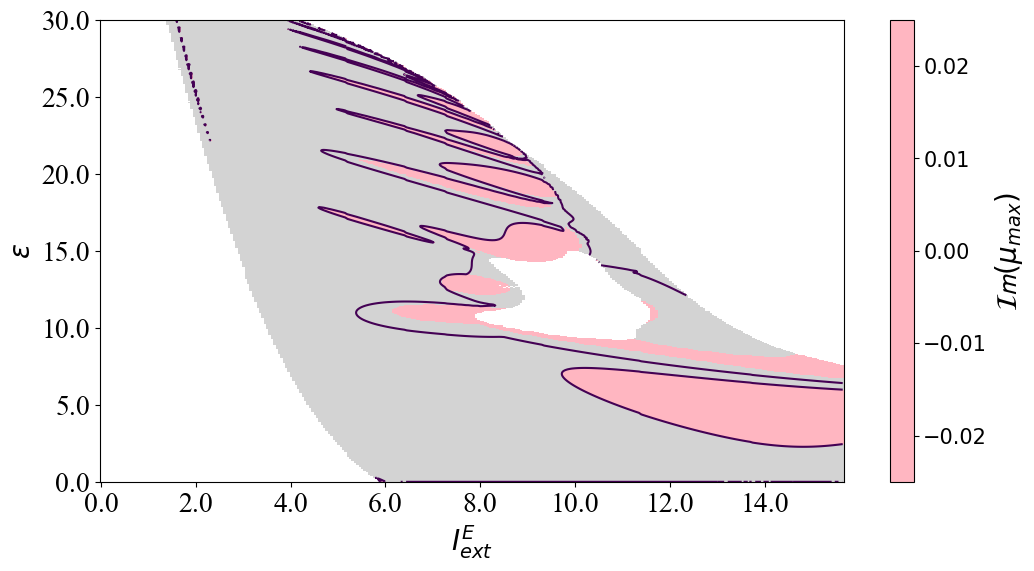

In [246]:
cmap_2 = ListedColormap([dic_color['lightpink']])

cmap_status2 = ListedColormap([dic_color['lightgray']])
status2 = np.transpose(np.where(dataStatus == 2,dataStatus,np.nan))

%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  

plt.imshow(status2,cmap=cmap_status2, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_2_pos,cmap=cmap_2, interpolation='nearest',vmin=-0.025,vmax=0.025)
cbar = plt.colorbar()
#plt.imshow(Floquet_3_pos,cmap=cmapBlue, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^E$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=40)
edges_yticks = np.arange(len(dataVector_eps),step=100)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/20,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/20,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\mathcal{Im}(\mu_{max})$',fontsize=20,fontname='Times New Roman')
plt.ylim([0,600])
plt.savefig('Definitive/Alpha2.png',dpi=500,bbox_inches=Bbox([[0,-1],fig1.get_size_inches()]))
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=15)
#cbar.set_label(r'$\mu_{max}$', fontsize=20,fontname='Times New Roman')

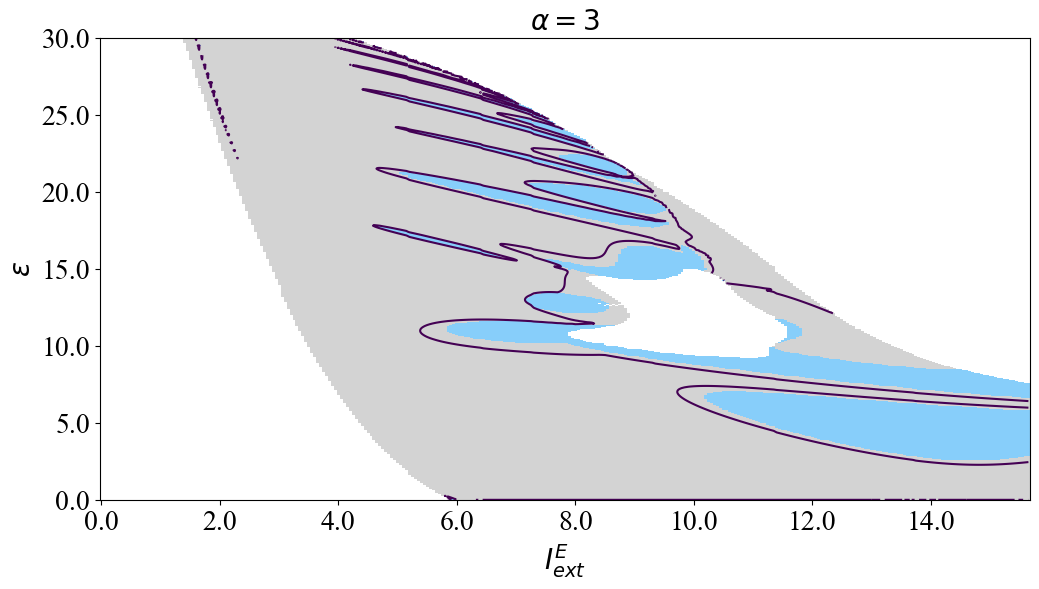

In [230]:
cmap_3 = ListedColormap([dic_color['lightskyblue']])


cmap_status2 = ListedColormap([dic_color['lightgray']])
status2 = np.transpose(np.where(dataStatus == 2,dataStatus,np.nan))

fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(status2,cmap=cmap_status2, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_3_pos,cmap=cmap_3, interpolation='nearest',vmin=-0.025,vmax=0.025)
#plt.imshow(Floquet_3_pos,cmap=cmapBlue, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^E$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=40)
edges_yticks = np.arange(len(dataVector_eps),step=100)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/20,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/20,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
plt.title(r'$\alpha=3$',fontsize=20,fontname='Times New Roman')
plt.ylim([0,600])
plt.savefig('Definitive/Alpha3.png',dpi=500,bbox_inches=Bbox([[0,-1],fig1.get_size_inches()]))
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=15)
#cbar.set_label(r'$\mu_{max}$', fontsize=20,fontname='Times New Roman')

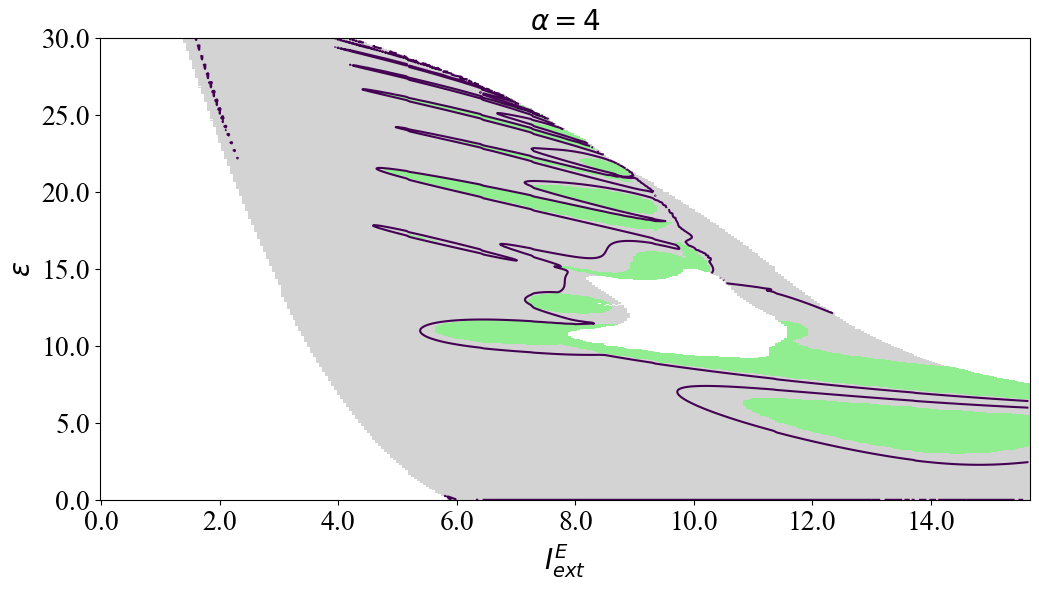

In [231]:
cmap_4 = ListedColormap([dic_color['lightgreen']])


cmap_status2 = ListedColormap([dic_color['lightgray']])
status2 = np.transpose(np.where(dataStatus == 2,dataStatus,np.nan))

fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(status2,cmap=cmap_status2, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_4_pos,cmap=cmap_4, interpolation='nearest',vmin=-0.025,vmax=0.025)
#plt.imshow(Floquet_3_pos,cmap=cmapBlue, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^E$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=40)
edges_yticks = np.arange(len(dataVector_eps),step=100)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/20,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/20,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
plt.title(r'$\alpha=4$',fontsize=20,fontname='Times New Roman')
plt.ylim([0,600])
plt.savefig('Definitive/Alpha4.png',dpi=500,bbox_inches=Bbox([[0,-1],fig1.get_size_inches()]))
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=15)
#cbar.set_label(r'$\mu_{max}$', fontsize=20,fontname='Times New Roman')

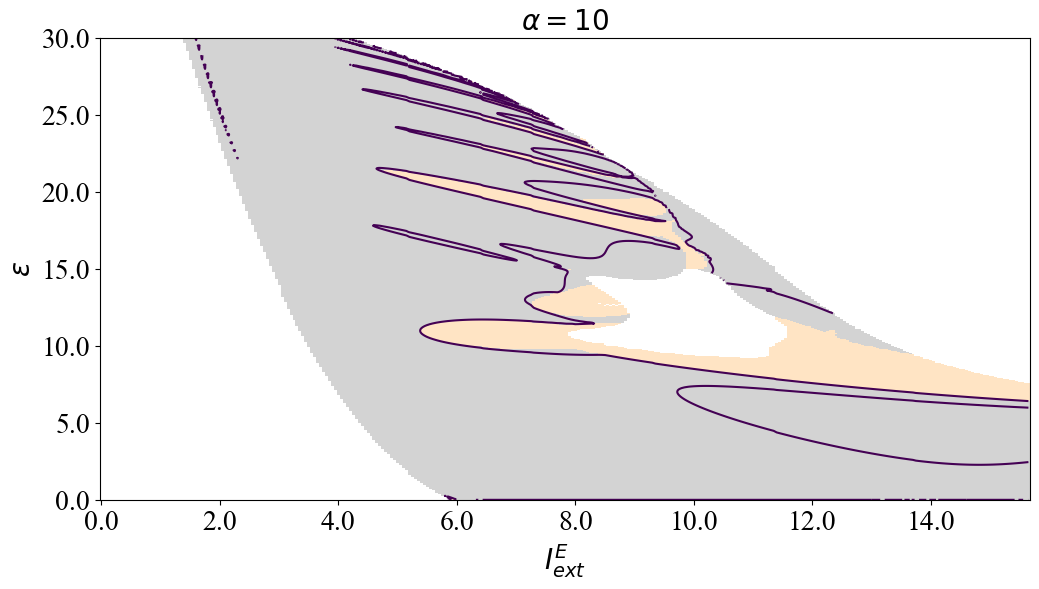

In [232]:
cmap_10 = ListedColormap([dic_color['bisque']])

cmap_status2 = ListedColormap([dic_color['lightgray']])
status2 = np.transpose(np.where(dataStatus == 2,dataStatus,np.nan))

fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(status2,cmap=cmap_status2, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(Floquet_10_pos,cmap=cmap_10, interpolation='nearest',vmin=-0.025,vmax=0.025)
#plt.imshow(Floquet_3_pos,cmap=cmapBlue, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^E$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=40)
edges_yticks = np.arange(len(dataVector_eps),step=100)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/20,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/20,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
plt.title(r'$\alpha=10$',fontsize=20,fontname='Times New Roman')
plt.ylim([0,600])
plt.savefig('Definitive/Alpha10.png',dpi=500,bbox_inches=Bbox([[0,-1],fig1.get_size_inches()]))
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=15)
#cbar.set_label(r'$\mu_{max}$', fontsize=20,fontname='Times New Roman')

Text(0.5, 1.0, '$\\alpha=40$')

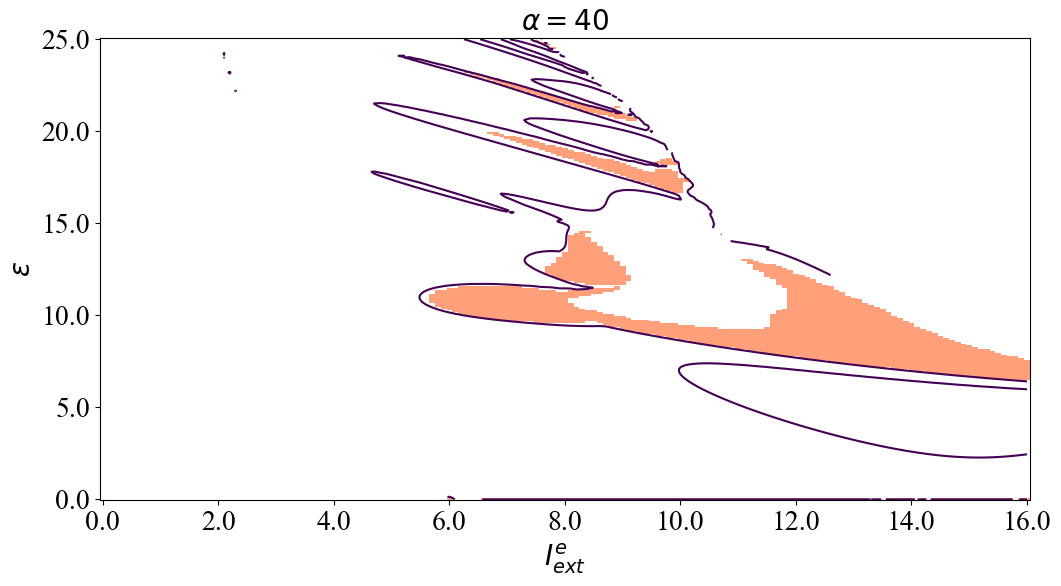

In [28]:
cmap_40 = ListedColormap([dic_color['lightsalmon']])

%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(Floquet_40_pos,cmap=cmap_40, interpolation='nearest',vmin=-0.025,vmax=0.025)
#plt.imshow(Floquet_3_pos,cmap=cmapBlue, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=20)
edges_yticks = np.arange(len(dataVector_eps),step=50)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/10,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/10,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
plt.title(r'$\alpha=40$',fontsize=20,fontname='Times New Roman')
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=15)
#cbar.set_label(r'$\mu_{max}$', fontsize=20,fontname='Times New Roman')


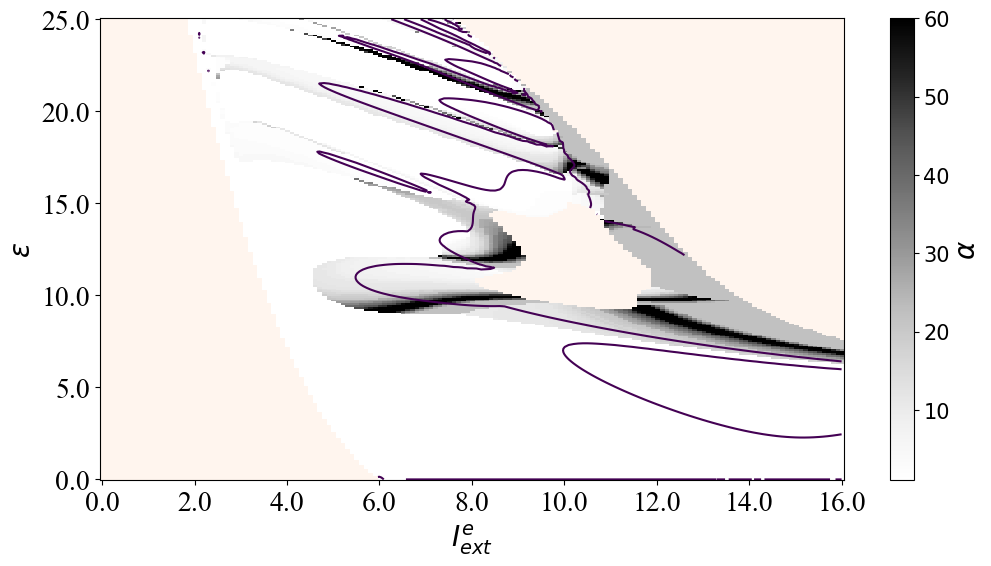

In [23]:
%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(indices,cmap='Greys', interpolation='nearest',vmax=60)
cbar = plt.colorbar()
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=20)
edges_yticks = np.arange(len(dataVector_eps),step=50)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/10,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/10,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\alpha$', fontsize=20,fontname='Times New Roman')
ax.set_facecolor(dic_color['seashell'])  # Set background color of the figure (entire plot)

In [167]:
# Copy indices
indicesPositive = np.copy(indices)

# Create a mask where maxFloquet is positive
mask = maxFloquet >= 0

# Set the elements in A where the mask is false to NaN
indicesPositive[~mask] = np.nan

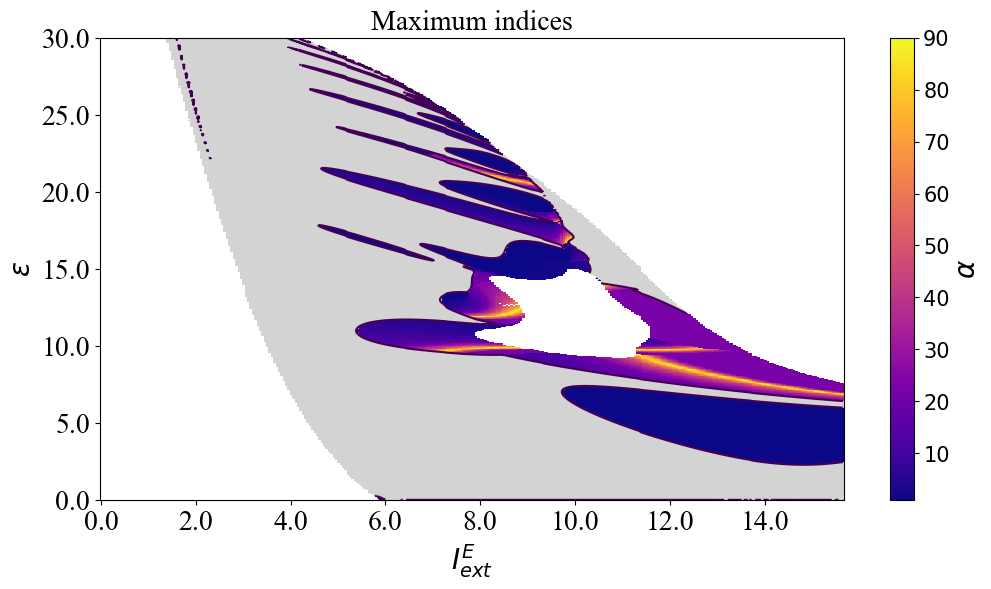

In [227]:
cmap_status2 = ListedColormap([dic_color['lightgray']])
status2 = np.transpose(np.where(dataStatus == 2,dataStatus,np.nan))

%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(status2,cmap=cmap_status2, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(indicesPositive,cmap='plasma', interpolation='nearest',vmax=90)
cbar = plt.colorbar()
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^E$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=40)
edges_yticks = np.arange(len(dataVector_eps),step=100)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/20,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/20,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\alpha$', fontsize=20,fontname='Times New Roman')
#ax.set_facecolor(dic_color['seashell'])  # Set background color of the figure (entire plot)
plt.title('Maximum indices',fontsize=20,fontname='Times New Roman')
plt.ylim([0,600])
plt.savefig('Definitive/MaxIndices.png',dpi=500,bbox_inches=Bbox([[0,-1],fig1.get_size_inches()]))


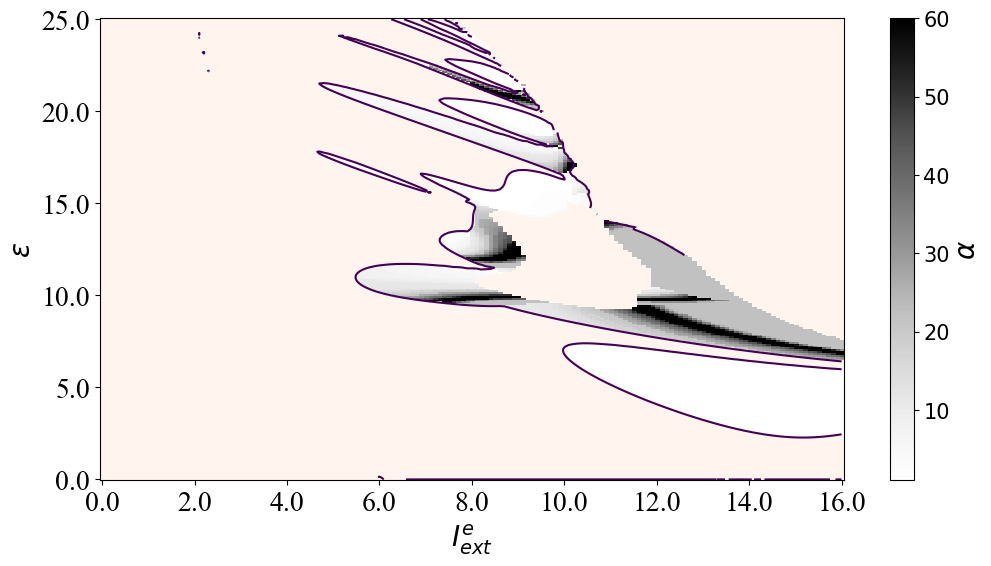

In [ ]:
%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  

plt.imshow(indicesPositive,cmap='Greys', interpolation='nearest',vmax=60)
cbar = plt.colorbar()
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=20)
edges_yticks = np.arange(len(dataVector_eps),step=50)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/10,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/10,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\alpha$', fontsize=20,fontname='Times New Roman')
ax.set_facecolor(dic_color['seashell'])  # Set background color of the figure (entire plot)

## Compute number of positive directions

In [ ]:
positive_directions = np.zeros((len(dataVector_eps),len(dataVector_Iext_e)))
for i in range(len(dataVector_eps)):
    for j in range(len(dataVector_Iext_e)):
        Floquet = dataFloquetReal[j,i,:]

        positive_directions[i,j] = np.sum((Floquet >= 0) & ~np.isnan(Floquet))
positive_directions[~mask] = np.nan


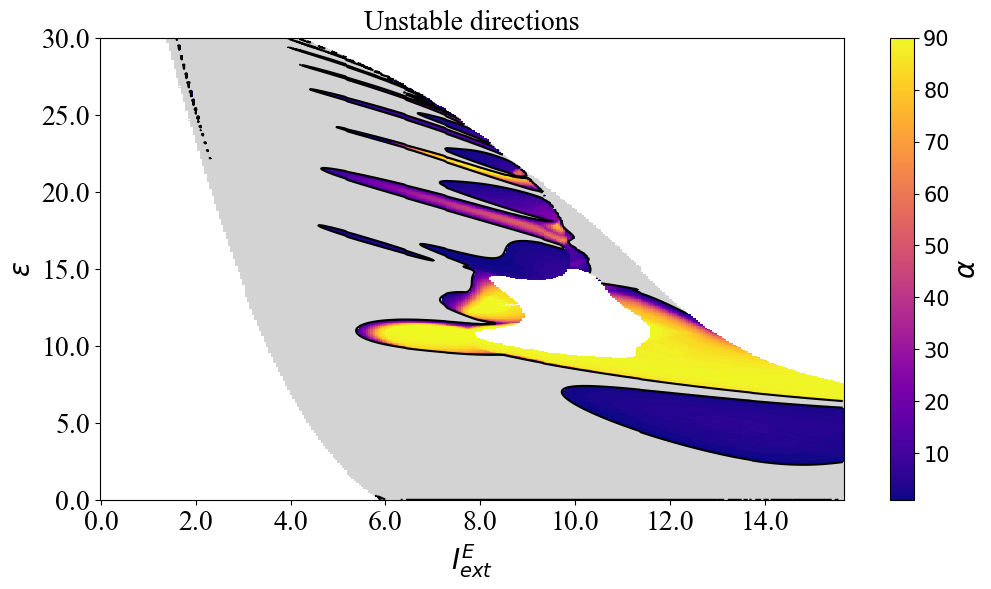

In [223]:
cmap_status2 = ListedColormap([dic_color['lightgray']])
status2 = np.transpose(np.where(dataStatus == 2,dataStatus,np.nan))

fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(status2,cmap=cmap_status2, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.imshow(positive_directions,cmap='plasma', interpolation='nearest')
cbar = plt.colorbar()
plt.contour(maxFloquet,levels=[0],colors='black')
plt.xlabel(r'$I_{ext}^E$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=40)
edges_yticks = np.arange(len(dataVector_eps),step=100)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/20,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/20,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\alpha$', fontsize=20,fontname='Times New Roman')
plt.title('Unstable directions',fontsize=20,fontname='Times New Roman')
plt.ylim([0,600])
plt.savefig('Definitive/UnstableDirections.png',dpi=500,bbox_inches=Bbox([[0,-1],fig1.get_size_inches()]))


Text(0.5, 1.0, 'Unstable directions')

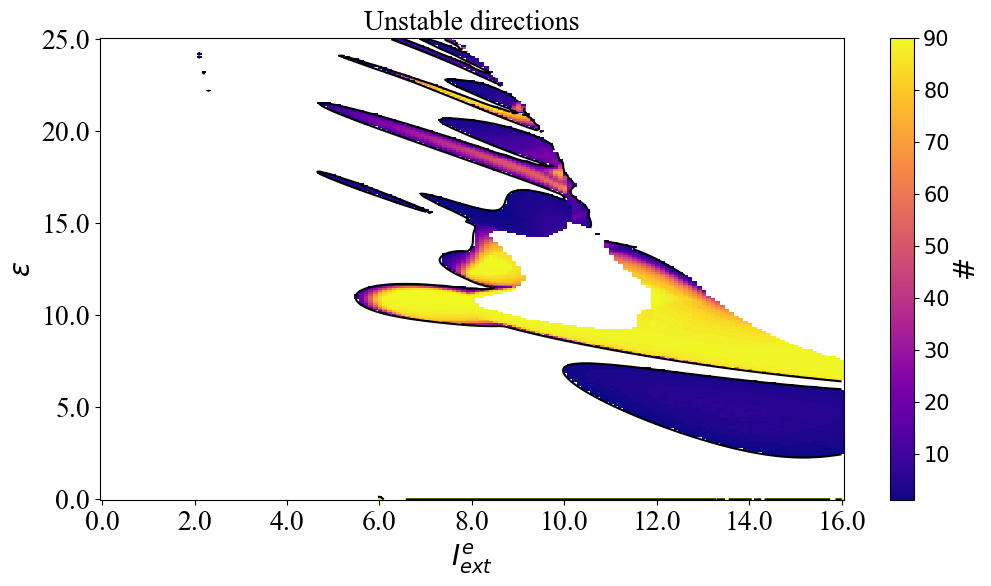

In [41]:
%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(positive_directions,cmap='plasma', interpolation='nearest')
cbar = plt.colorbar()
plt.contour(maxFloquet,levels=[0],colors='black')
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=20)
edges_yticks = np.arange(len(dataVector_eps),step=50)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/10,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/10,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\#$', fontsize=20,fontname='Times New Roman')
plt.title('Unstable directions',fontsize=20,fontname='Times New Roman')

In [25]:
np.where(dataStatus == 4 )

(array([ 19,  24,  27,  32,  38,  39,  47,  57,  90,  96, 102, 104, 107,
        111, 112, 123, 126, 127, 128, 130, 132, 133, 134, 135, 138, 140,
        143, 144, 153, 154, 155, 158, 159]),
 array([242, 192, 165, 124,  83,  77,  37,   6, 217, 204, 190, 185, 177,
        166, 163, 131, 123, 120, 118, 113, 109, 107, 105, 103,  98,  95,
         91,  90,  81,  80,  79,  77,  76]))

In [26]:
np.where(dataStatus == 5 )

(array([ 21,  56, 124]), array([221,   8, 128]))

In [27]:
dataStatus[19,242]

np.float64(4.0)

### Status 0

Text(0.5, 1.0, 'Status = 0')

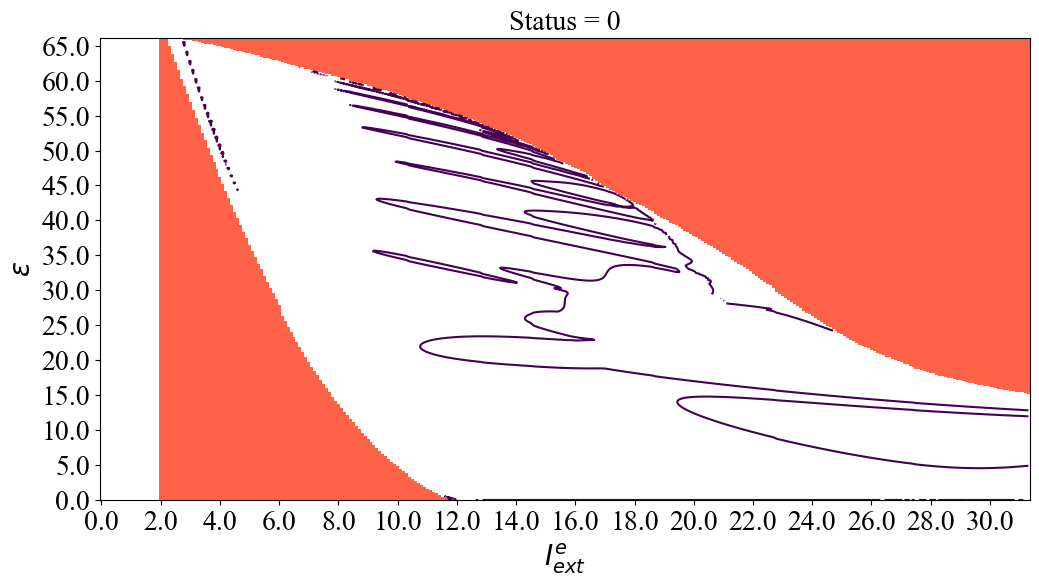

In [205]:
cmap_status0 = ListedColormap([dic_color['tomato']])
status0 = np.transpose(np.where(dataStatus == 0,dataStatus,np.nan))

%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(status0,cmap=cmap_status0, interpolation='nearest',vmin=-0.025,vmax=0.025)
#plt.imshow(Floquet_3_pos,cmap=cmapBlue, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=20)
edges_yticks = np.arange(len(dataVector_eps),step=50)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/10,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/10,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
plt.title(r'Status = 0',fontsize=20,fontname='Times New Roman')
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=15)

### Status 1

Text(0.5, 1.0, 'Status = 1')

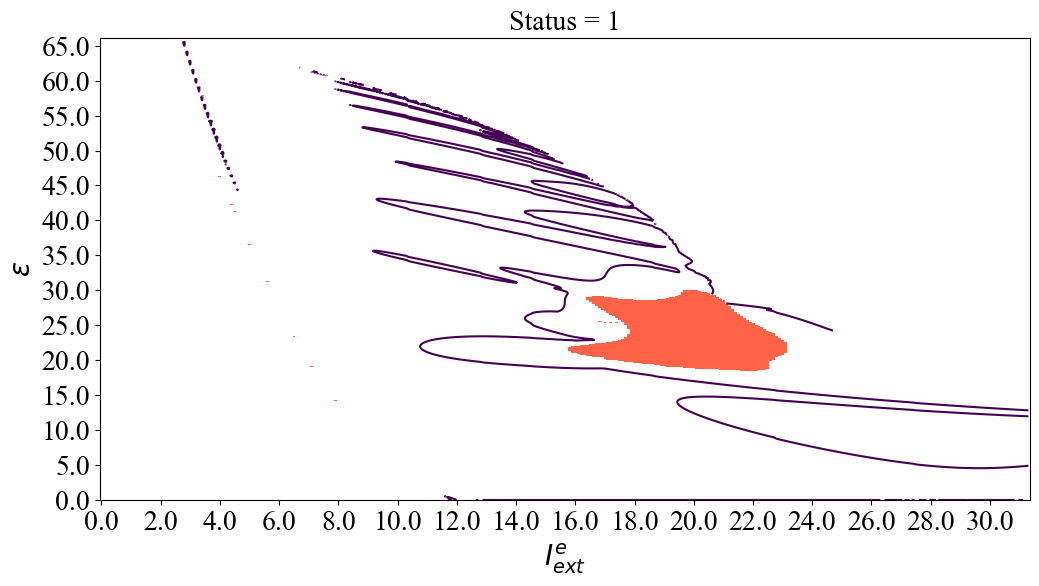

In [206]:
cmap_status1 = ListedColormap([dic_color['tomato']])
status1 = np.transpose(np.where(dataStatus == 1,dataStatus,np.nan))

%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(status1,cmap=cmap_status1, interpolation='nearest',vmin=-0.025,vmax=0.025)
#plt.imshow(Floquet_3_pos,cmap=cmapBlue, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=20)
edges_yticks = np.arange(len(dataVector_eps),step=50)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/10,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/10,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
plt.title(r'Status = 1',fontsize=20,fontname='Times New Roman')
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=15)

### Status 2

Text(0.5, 1.0, 'Status = 2')

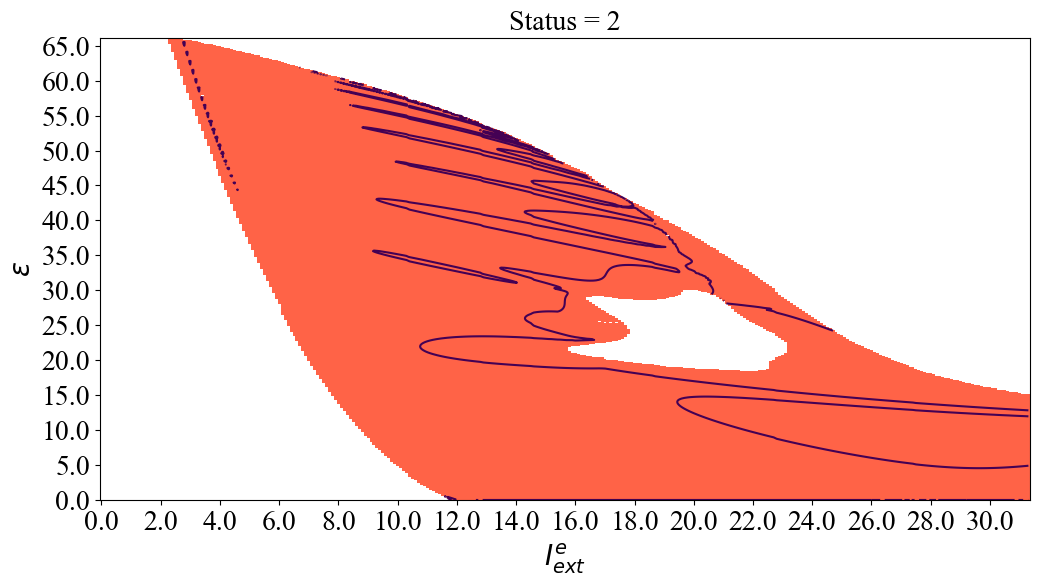

In [209]:
cmap_status2 = ListedColormap([dic_color['tomato']])
status2 = np.transpose(np.where(dataStatus == 2,dataStatus,np.nan))

%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(status2,cmap=cmap_status2, interpolation='nearest',vmin=-0.025,vmax=0.025)
#plt.imshow(Floquet_3_pos,cmap=cmapBlue, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=20)
edges_yticks = np.arange(len(dataVector_eps),step=50)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/10,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/10,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
plt.title(r'Status = 2',fontsize=20,fontname='Times New Roman')
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=15)

### Status 4

Text(0.5, 1.0, 'Status=4')

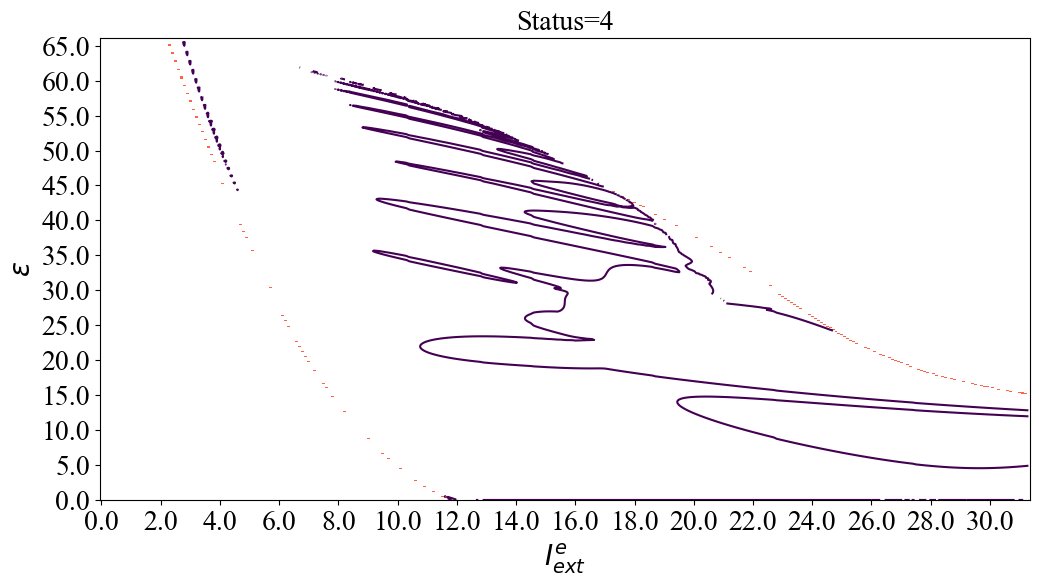

In [208]:
cmap_status4 = ListedColormap([dic_color['tomato']])
status4 = np.transpose(np.where(dataStatus == 4,dataStatus,np.nan))

%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(status4,cmap=cmap_status4, interpolation='nearest',vmin=-0.025,vmax=0.025)
#plt.imshow(Floquet_3_pos,cmap=cmapBlue, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=20)
edges_yticks = np.arange(len(dataVector_eps),step=50)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/10,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/10,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
plt.title(r'Status=4',fontsize=20,fontname='Times New Roman')
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=15)

### Status 5

Text(0.5, 1.0, 'Status = 5')

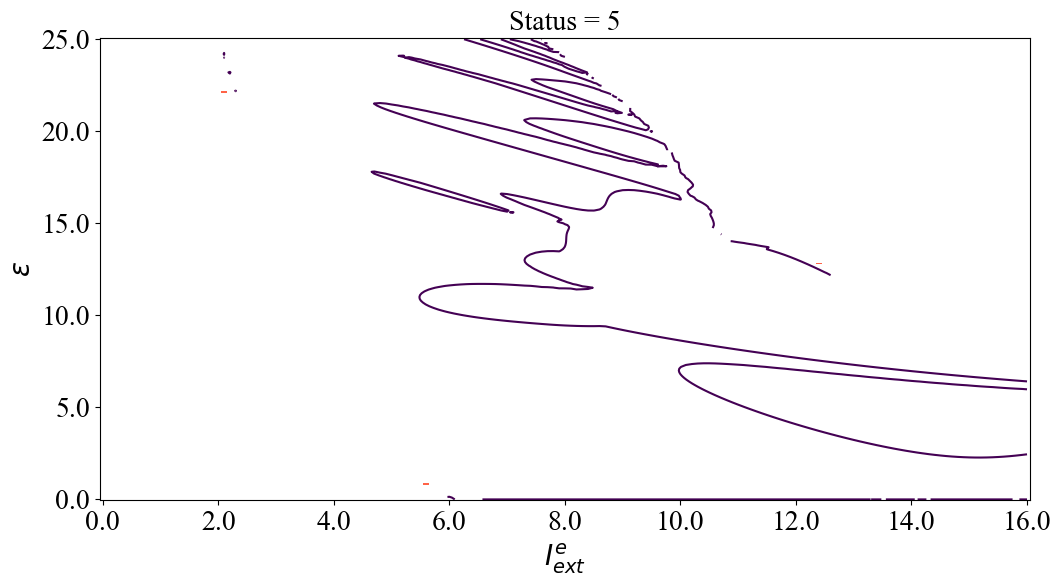

In [54]:
cmap_status5 = ListedColormap([dic_color['tomato']])
status5 = np.transpose(np.where(dataStatus == 5,dataStatus,np.nan))

%matplotlib inline
fig1=plt.figure(figsize=(12,6))
ax=plt.axes()  
plt.imshow(status5,cmap=cmap_status5, interpolation='nearest',vmin=-0.025,vmax=0.025)
#plt.imshow(Floquet_3_pos,cmap=cmapBlue, interpolation='nearest',vmin=-0.025,vmax=0.025)
plt.contour(maxFloquet,levels=[0])
plt.xlabel(r'$I_{ext}^e$',fontsize=20,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=20,fontname='Times New Roman')
edges_xticks = np.arange(len(dataVector_Iext_e),step=20)
edges_yticks = np.arange(len(dataVector_eps),step=50)
plt.xticks(ticks=edges_xticks,labels=edges_xticks/10,fontsize=20,fontname='Times New Roman')#,rotation=45)
plt.yticks(ticks=edges_yticks,labels=edges_yticks/10,fontsize=20,fontname='Times New Roman')

plt.gca().set_aspect('auto')
plt.gca().invert_yaxis()
plt.title(r'Status = 5',fontsize=20,fontname='Times New Roman')
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=15)